# Import modules

In [1]:
import os # to get current working directory
import numpy as np # to read example data
import trspecfit as trsfit # main module

# Example: Two peaks with dependent parameters (+offset +background)

## Create a project (defines axis labels among other parameters)

In [2]:
project_folder = os.getcwd() # path to data folder(s)
P = trsfit.Project(path=project_folder)

## Create a file (the fit models will be associated with this)

In [3]:
file_folder = "data" # define where data of our file is located (in project folder)
# load data into a trsfit.File
F = trsfit.File(P, 
                path = file_folder,
                data = np.loadtxt(P.path / file_folder / "data.csv", delimiter=','),
                energy = np.loadtxt(P.path / file_folder / "energy.csv"),
                time = np.loadtxt(P.path / file_folder / "time.csv")
               )

## Set limits (in time and energy) for the fit models

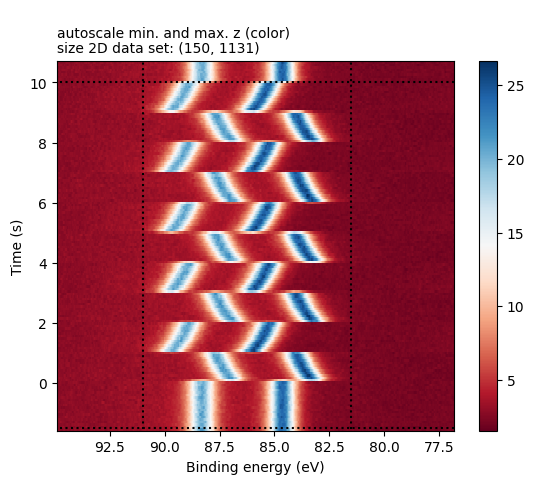

In [4]:
F.set_fit_limits(energy_limits = [91, 81.5],
                 time_limits = [-1.5, 10])

## Define the baseline/ ground state/ unbiased portion of the spectrum 

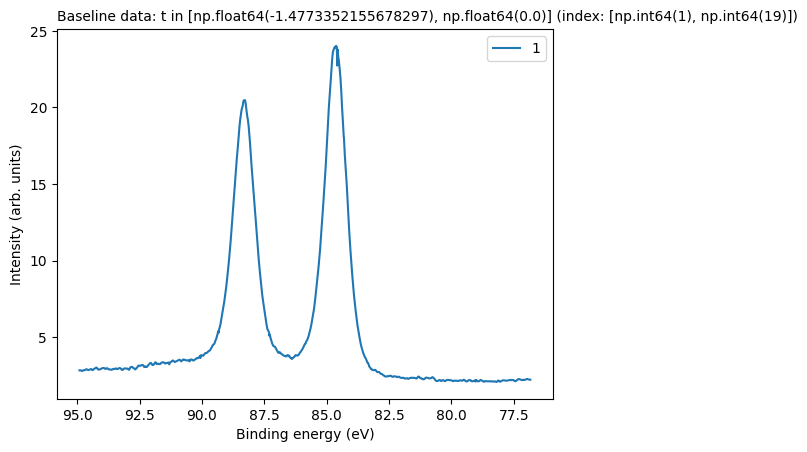

In [5]:
F.define_baseline(-1.5, 0, time_type='abs') # use absolute time values ...
#F.define_baseline(0, 19, time_type='ind') # ... or start and stop index

In [6]:
F.reset_models() # use this to delete all models previously loaded in this file

## Load a model for the basline spectrum and fit it

In [7]:
model_name_base = "base" # select model name

F.load_model(model_yaml = "models_Au4f.yaml",
             model_info = [model_name_base,])
F.describe_model(model_info=model_name_base, detail=0)

Loading model to describe energy- (and time-)dependent data: base
model name: base
function: Offset from <module 'trspecfit.functions.energy' from 'C:\\Users\\jmahl\\OneDrive\\Documents\\GitHub\\trsf-dev\\src\\trspecfit\\functions\\energy.py'>
function: Shirley from <module 'trspecfit.functions.energy' from 'C:\\Users\\jmahl\\OneDrive\\Documents\\GitHub\\trsf-dev\\src\\trspecfit\\functions\\energy.py'>
function: GLP from <module 'trspecfit.functions.energy' from 'C:\\Users\\jmahl\\OneDrive\\Documents\\GitHub\\trsf-dev\\src\\trspecfit\\functions\\energy.py'>
function: GLP from <module 'trspecfit.functions.energy' from 'C:\\Users\\jmahl\\OneDrive\\Documents\\GitHub\\trsf-dev\\src\\trspecfit\\functions\\energy.py'>
all (1D flattened if applicable) lmfit.Parameters(): [sorted alphabetically]
Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
GLP_01_A         20        5       25     None     True     None     None
GLP_01_F          1     0.75      2.5     None     

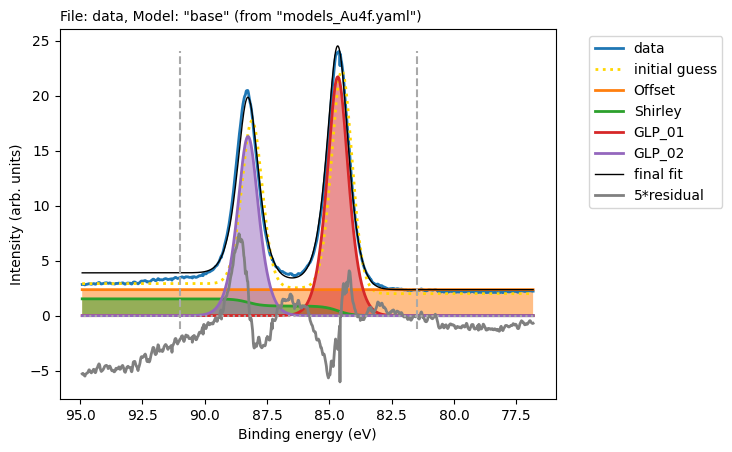

Time elapsed for baseline fit: 03.507(ss.ms)


name,value,standard error,relative error,initial value,min,max,vary,expression
y0,2.36442833,0.04480886,(1.90%),2.3643981302923245,0.00000000,5.00000000,True,
p_Shirley,570.351594,20.2177547,(3.54%),570.3401772013866,1.0000e-06,1000.00000,True,
GLP_01_A,21.7187025,0.09482298,(0.44%),21.7186559680015,5.00000000,25.0000000,True,
GLP_01_x0,84.6620189,0.00167710,(0.00%),84.66201864687177,82.0000000,88.0000000,True,
GLP_01_F,1.03506470,0.00648323,(0.63%),1.035068801070645,0.75000000,2.50000000,True,
GLP_01_m,0.62704764,0.02130233,(3.40%),0.6270368153990802,0.00000000,1.00000000,True,
GLP_02_A,16.2890269,0.07111723,(0.44%),16.288991976001125,-inf,inf,False,3/4*GLP_01_A
GLP_02_x0,88.2620189,0.00167710,(0.00%),88.26201864687177,-inf,inf,False,GLP_01_x0 +3.6
GLP_02_F,1.03506470,0.00648323,(0.63%),1.035068801070645,-inf,inf,False,GLP_01_F
GLP_02_m,0.62704764,0.02130233,(3.40%),0.6270368153990802,-inf,inf,False,GLP_01_m


In [8]:
F.fit_baseline(model_name = model_name_base, fit = 2)

## Load a model to fit data "Slice-by-Slice"

In [9]:
model_name_SbS = "2D" # select model name

F.load_model(model_yaml = "models_Au4f.yaml",
             model_info = [model_name_SbS,])
F.describe_model(model_name_SbS, detail=0)

Loading model to describe energy- (and time-)dependent data: 2D
model name: 2D
function: Offset from <module 'trspecfit.functions.energy' from 'C:\\Users\\jmahl\\OneDrive\\Documents\\GitHub\\trsf-dev\\src\\trspecfit\\functions\\energy.py'>
function: Shirley from <module 'trspecfit.functions.energy' from 'C:\\Users\\jmahl\\OneDrive\\Documents\\GitHub\\trsf-dev\\src\\trspecfit\\functions\\energy.py'>
function: GLP from <module 'trspecfit.functions.energy' from 'C:\\Users\\jmahl\\OneDrive\\Documents\\GitHub\\trsf-dev\\src\\trspecfit\\functions\\energy.py'>
function: GLP from <module 'trspecfit.functions.energy' from 'C:\\Users\\jmahl\\OneDrive\\Documents\\GitHub\\trsf-dev\\src\\trspecfit\\functions\\energy.py'>
all (1D flattened if applicable) lmfit.Parameters(): [sorted alphabetically]
Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
GLP_01_A         20        5       25     None    False     None     None
GLP_01_F          1     0.75      2.5     None    False

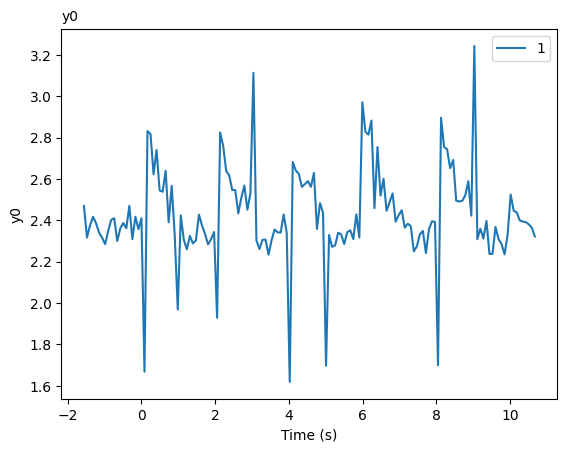

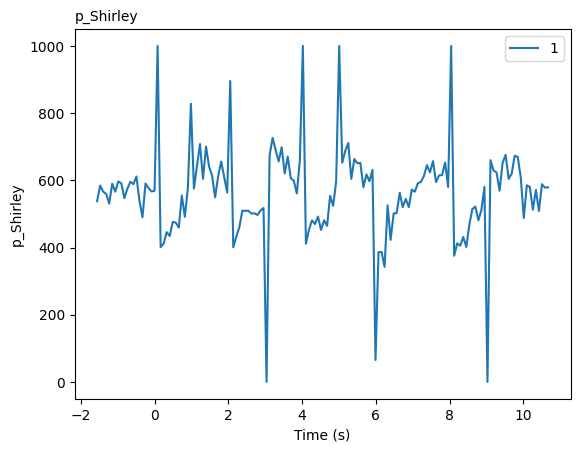

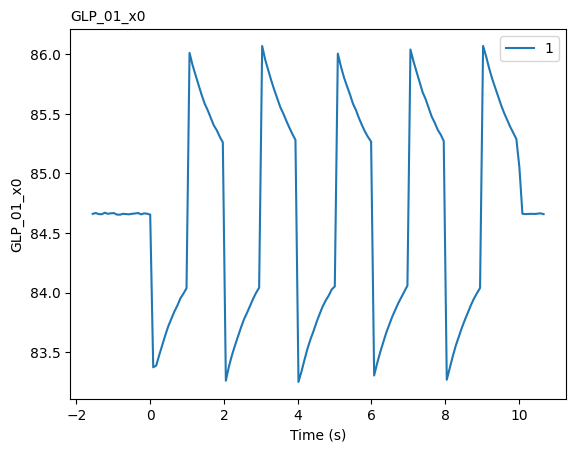

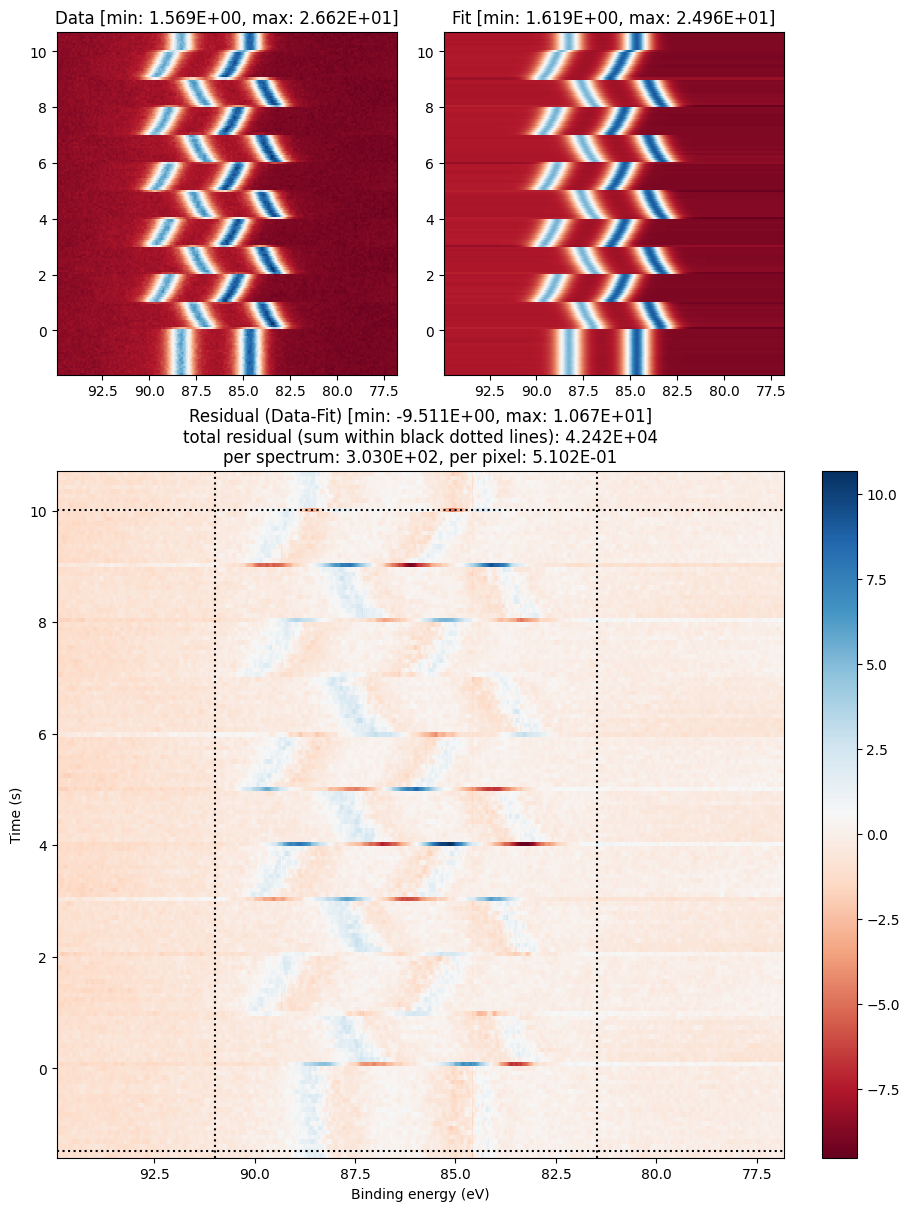

Time elapsed for Slice-by-Slice fit: 43.537(ss.ms)


In [10]:
F.fit_SliceBySlice(model_name = model_name_SbS,
                   fit = 1,
                   try_CI = 0)

## Load a model to perform a global 2D fit

In [11]:
# load energy/spectroscopy model
model_name_2D = "2D" # select model name
F.delete_model(model_name_2D)
F.load_model(model_yaml = "models_Au4f.yaml",
             model_info = [model_name_2D,])
F.describe_model(model_info=model_name_2D, detail=0)

Loading model to describe energy- (and time-)dependent data: 2D
model name: 2D
function: Offset from <module 'trspecfit.functions.energy' from 'C:\\Users\\jmahl\\OneDrive\\Documents\\GitHub\\trsf-dev\\src\\trspecfit\\functions\\energy.py'>
function: Shirley from <module 'trspecfit.functions.energy' from 'C:\\Users\\jmahl\\OneDrive\\Documents\\GitHub\\trsf-dev\\src\\trspecfit\\functions\\energy.py'>
function: GLP from <module 'trspecfit.functions.energy' from 'C:\\Users\\jmahl\\OneDrive\\Documents\\GitHub\\trsf-dev\\src\\trspecfit\\functions\\energy.py'>
function: GLP from <module 'trspecfit.functions.energy' from 'C:\\Users\\jmahl\\OneDrive\\Documents\\GitHub\\trsf-dev\\src\\trspecfit\\functions\\energy.py'>
all (1D flattened if applicable) lmfit.Parameters(): [sorted alphabetically]
Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
GLP_01_A         20        5       25     None    False     None     None
GLP_01_F          1     0.75      2.5     None    False

In [12]:
# add time dependence for one or more parameters
F.add_time_dependence(model_yaml = "models_time.yaml",
                      model_info = ["IRF", "MonoExpNeg", "MonoExpPos"],
                      par_name = "GLP_01_x0",
                      frequency = 0.5)
print()
F.describe_model(model_info=[model_name_2D,], detail=1)

Loading model to describe time-dependence of a model parameter: GLP_01_x0 of IRF_MonoExpNeg_MonoExpPos model

model name: 2D
function: Offset from <module 'trspecfit.functions.energy' from 'C:\\Users\\jmahl\\OneDrive\\Documents\\GitHub\\trsf-dev\\src\\trspecfit\\functions\\energy.py'>
function: Shirley from <module 'trspecfit.functions.energy' from 'C:\\Users\\jmahl\\OneDrive\\Documents\\GitHub\\trsf-dev\\src\\trspecfit\\functions\\energy.py'>
function: GLP from <module 'trspecfit.functions.energy' from 'C:\\Users\\jmahl\\OneDrive\\Documents\\GitHub\\trsf-dev\\src\\trspecfit\\functions\\energy.py'>
function: GLP from <module 'trspecfit.functions.energy' from 'C:\\Users\\jmahl\\OneDrive\\Documents\\GitHub\\trsf-dev\\src\\trspecfit\\functions\\energy.py'>
all (1D flattened if applicable) lmfit.Parameters(): [sorted alphabetically]
Name                        Value      Min      Max   Stderr     Vary     Expr Brute_Step
GLP_01_A                       20        5       25     None    False

ValueError: Error evaluating expression 'GLP_01_x0 +3.6': Interpreter.__call__() takes 2 positional arguments but 3 were given

In [17]:
# perform fit
F.fit_2Dmodel(model_name = model_name_2D,
              fit = 2,
              try_CI = 0)

Parameters passed in lmfit format:


name,value,initial value,min,max,vary,expression
y0,2.36442847,None,0.00000000,5.00000000,False,
pShirley,570.351619,None,1.0000e-06,1000.00000,False,
GLP_01_A,21.7187022,None,5.00000000,25.0000000,False,
GLP_01_x0,84.6620189,None,82.0000000,88.0000000,True,
GLP_01_x0_gaussCONV_01_SD,0.10000000,None,0.00000000,1.00000000,True,
GLP_01_x0_expFun_02_A,-3.00000000,None,-10.0000000,10.0000000,True,
GLP_01_x0_expFun_02_tau,2.50000000,None,1.00000000,10.0000000,True,
GLP_01_x0_expFun_02_t0,0.00000000,None,0.00000000,1.00000000,False,
GLP_01_x0_expFun_02_y0,0.00000000,None,0.00000000,1.00000000,False,
GLP_01_x0_expFun_03_A,3.00000000,None,-10.0000000,10.0000000,True,



Constants input to residual function:


(array([94.912, 94.896, 94.88 , ..., 76.864, 76.848, 76.832]),
 array([[2.89868442, 2.93883672, 2.92937057, ..., 2.30293005, 2.30523848,
         2.33958714],
        [2.59062806, 2.55983148, 2.56991521, ..., 2.42038118, 2.42700959,
         2.40400816],
        [3.00010024, 2.98306178, 2.89608777, ..., 2.20010489, 2.23571821,
         2.20985707],
        ...,
        [2.72489672, 2.83754678, 2.91130271, ..., 2.33750073, 2.33224948,
         2.27561081],
        [3.12437073, 3.15853626, 3.10957362, ..., 2.28697455, 2.31542292,
         2.30004616],
        [2.66538026, 2.6111897 , 2.69401285, ..., 2.33661417, 2.27911289,
         2.19963864]]),
 <module 'trspecfit.XPSspectra' from 'C:\\Users\\jmahl\\OneDrive\\Documents\\GitHub\\time-resolved-spectroscopy-fit\\src\\trspecfit\\XPSspectra.py'>,
 'fit_model_mcp',
 0,
 [245, 292],
 [1, 141])

Arguments input to fit function:


(<trspecfit.mcp.Model at 0x19aeb561280>, 2, False)


Time initialize: 0.0 s


KeyboardInterrupt: 